In [19]:
import libraryF1dataNotebook as libraryDataF1
import pandas as pd

## Model GP with Sprint Format

## Obtain session information

In [20]:
libraryDataF1.obtain_information('sessions',year=2024,country_acronym='USA')

https://api.openf1.org/v1/sessions?year=2024&country_code=USA


,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
0,9497,Practice 1,2024-05-03T16:30:00+00:00,2024-05-03T17:30:00+00:00,-04:00:00,Practice,1234,Miami,19,USA,United States,151,Miami,2024
1,9502,Sprint Qualifying,2024-05-03T20:30:00+00:00,2024-05-03T21:14:00+00:00,-04:00:00,Qualifying,1234,Miami,19,USA,United States,151,Miami,2024
2,9506,Sprint,2024-05-04T16:00:00+00:00,2024-05-04T16:30:00+00:00,-04:00:00,Race,1234,Miami,19,USA,United States,151,Miami,2024
3,9498,Qualifying,2024-05-04T20:00:00+00:00,2024-05-04T21:00:00+00:00,-04:00:00,Qualifying,1234,Miami,19,USA,United States,151,Miami,2024
4,9507,Race,2024-05-05T20:00:00+00:00,2024-05-05T22:00:00+00:00,-04:00:00,Race,1234,Miami,19,USA,United States,151,Miami,2024


## Free Practice
### Obtain setup

In [21]:
practice = libraryDataF1.obtain_information('laps',session_key=9497)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9497)
drivers = libraryDataF1.obtain_information('drivers',session_key=9497)

https://api.openf1.org/v1/laps?session_key=9497
https://api.openf1.org/v1/stints?session_key=9497
https://api.openf1.org/v1/drivers?session_key=9497


In [22]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1234,9497,20,204.0,175.0,307.0,2024-05-03T16:30:02.658000+00:00,NaN,True,NaN,37.730,27.186,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2049, 2049, 2049, 2051, 2049, 205...","[2051, 2049, 2051, 2049, 2051, 2049, 0]",1,HARD,MAG,Kevin MAGNUSSEN,Haas F1 Team
1,1234,9497,31,197.0,147.0,286.0,2024-05-03T16:30:06.896000+00:00,NaN,True,NaN,40.554,28.801,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2051, 2049, 2051, 2049, 2049, 0]",1,HARD,OCO,Esteban OCON,Alpine
2,1234,9497,81,196.0,87.0,144.0,2024-05-03T16:30:10.445000+00:00,NaN,True,NaN,41.754,32.018,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2048, 2049]",1,HARD,PIA,Oscar PIASTRI,McLaren
3,1234,9497,4,173.0,132.0,292.0,2024-05-03T16:30:21.335000+00:00,NaN,True,NaN,41.737,34.479,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2049, 2049]",1,HARD,NOR,Lando NORRIS,McLaren
4,1234,9497,10,199.0,164.0,275.0,2024-05-03T16:30:24.612000+00:00,NaN,True,NaN,38.336,28.832,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 205...","[2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 0]",1,HARD,GAS,Pierre GASLY,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,1234,9497,81,169.0,145.0,196.0,2024-05-03T17:33:36.162000+00:00,140.311,False,61.548,42.331,36.432,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],24,SOFT,PIA,Oscar PIASTRI,McLaren
459,1234,9497,4,214.0,140.0,225.0,2024-05-03T17:33:44.937000+00:00,144.745,False,59.782,45.996,38.967,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],21,HARD,NOR,Lando NORRIS,McLaren
460,1234,9497,24,210.0,158.0,134.0,2024-05-03T17:33:48.274000+00:00,140.400,False,52.957,43.906,43.537,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],24,SOFT,ZHO,ZHOU Guanyu,Kick Sauber
461,1234,9497,22,169.0,152.0,248.0,2024-05-03T17:33:49.428000+00:00,142.068,False,59.837,47.976,34.255,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],25,MEDIUM,TSU,Yuki TSUNODA,RB


### See race pace by means of the charts

### Medium tyres

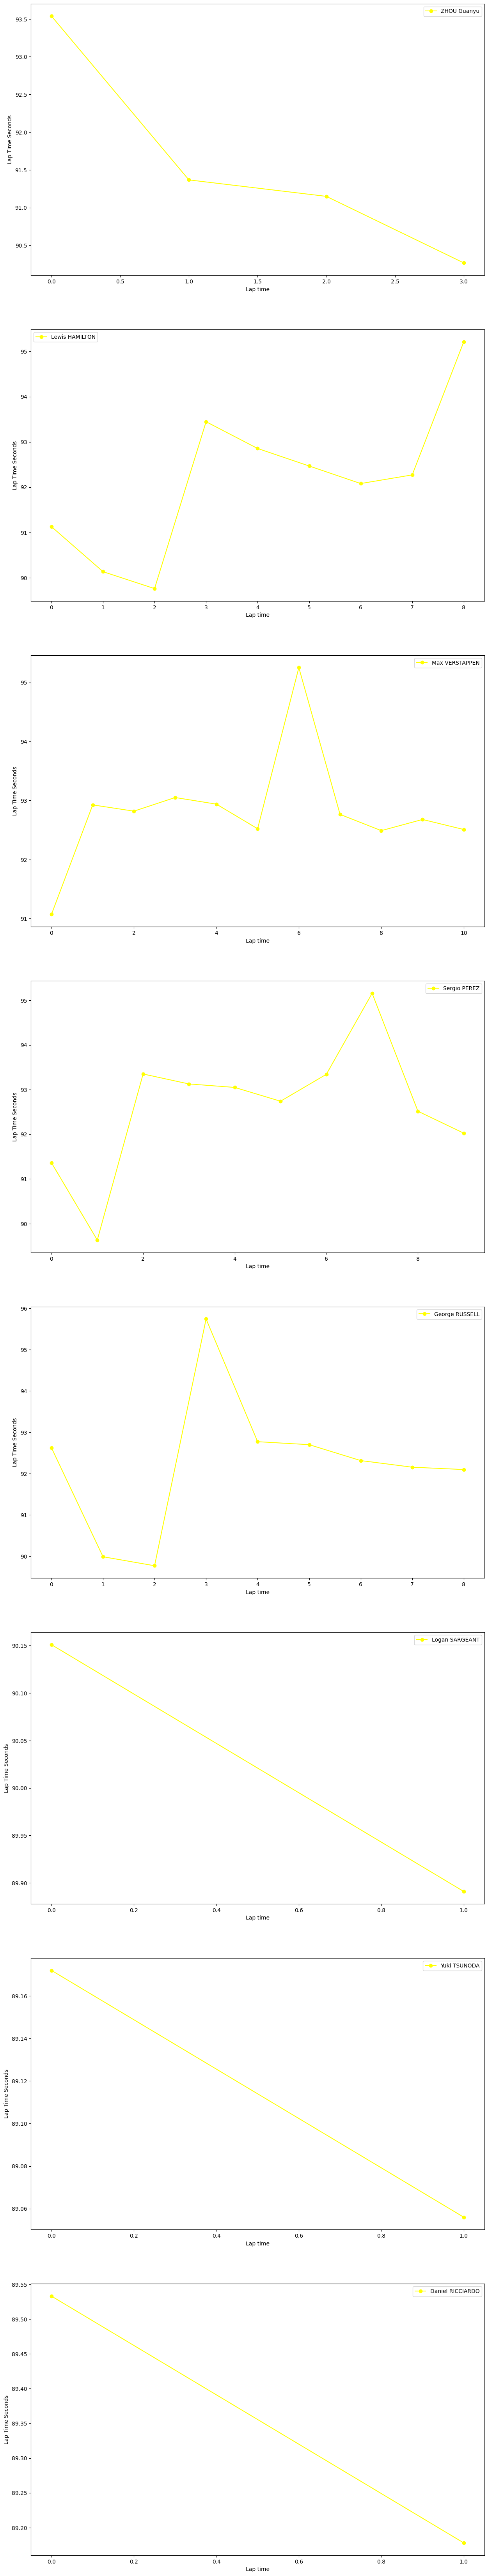

In [23]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",97)

### Soft tyres

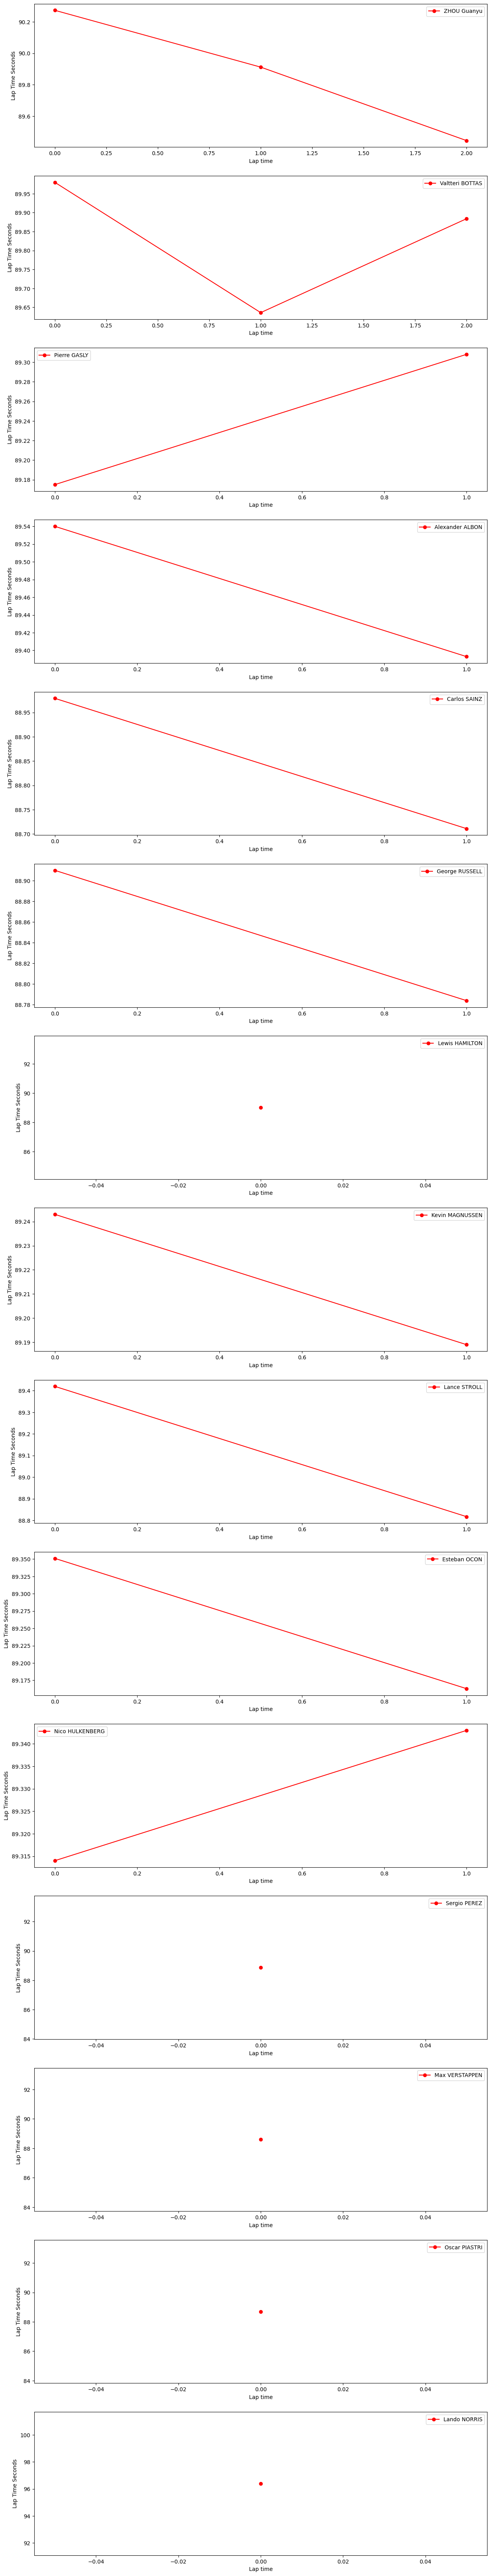

In [24]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",97)

### Hard tyres

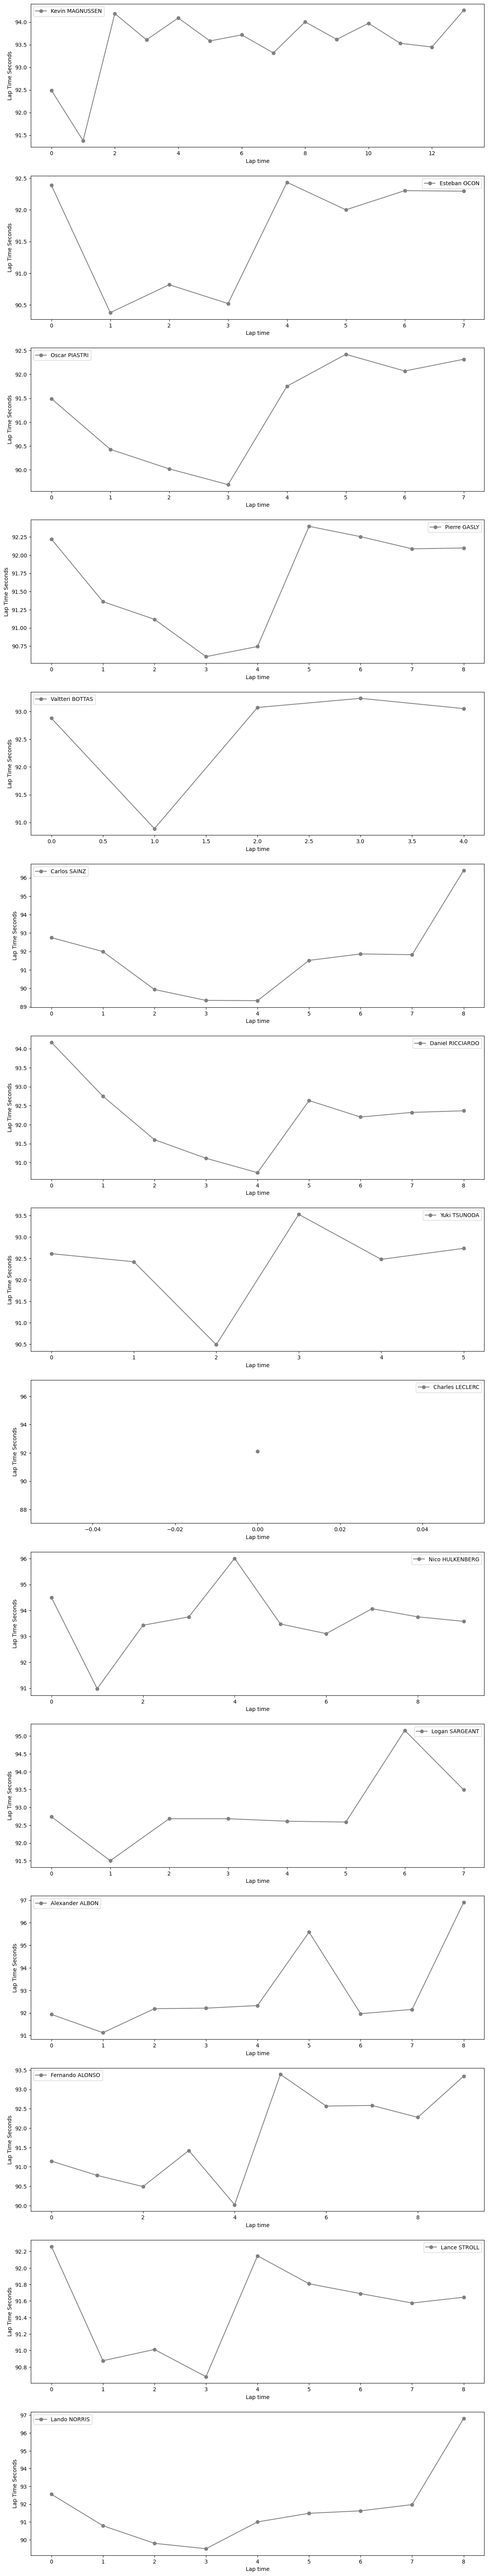

In [25]:
libraryDataF1.obtain_data_tyres(jointables2,"HARD",97)

### Speed trap

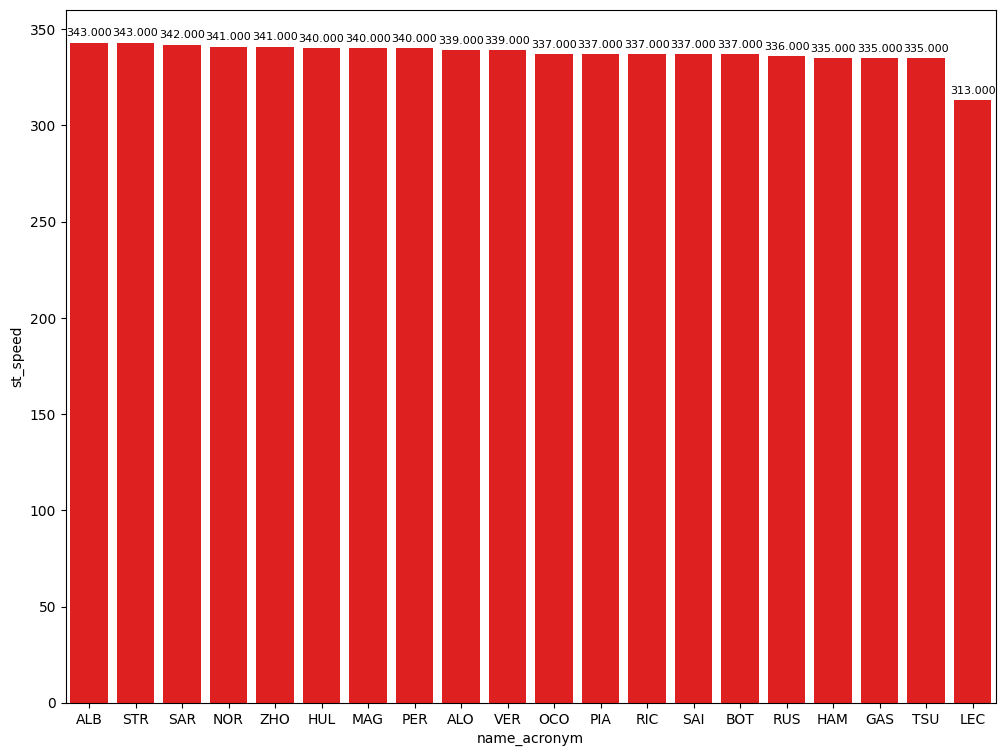

In [26]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

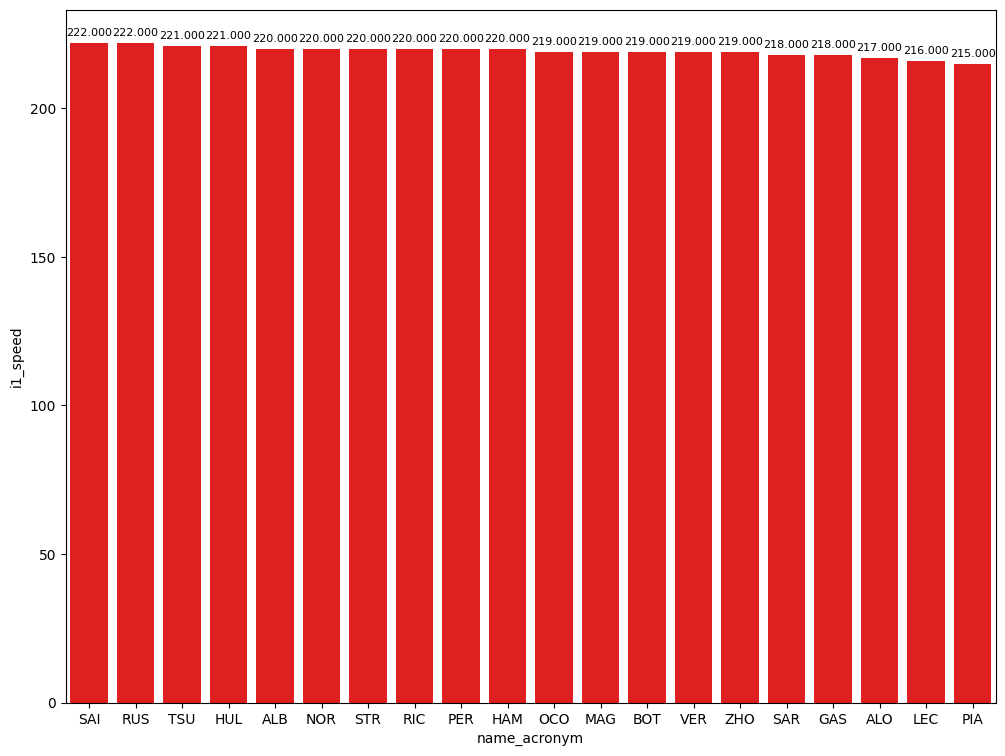

In [27]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

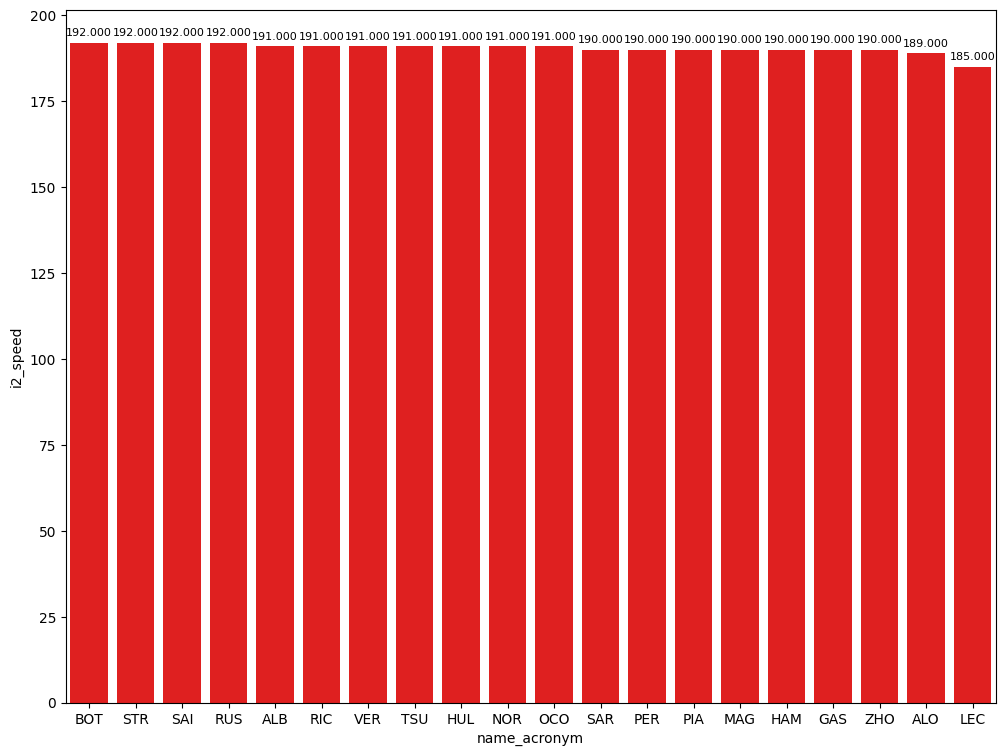

In [28]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [29]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
212,Carlos SAINZ,HARD,29.814,34.156,25.361,89.331
406,Yuki TSUNODA,MEDIUM,30.010,33.803,25.243,89.056
395,Max VERSTAPPEN,SOFT,29.606,33.604,25.385,88.595


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [30]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


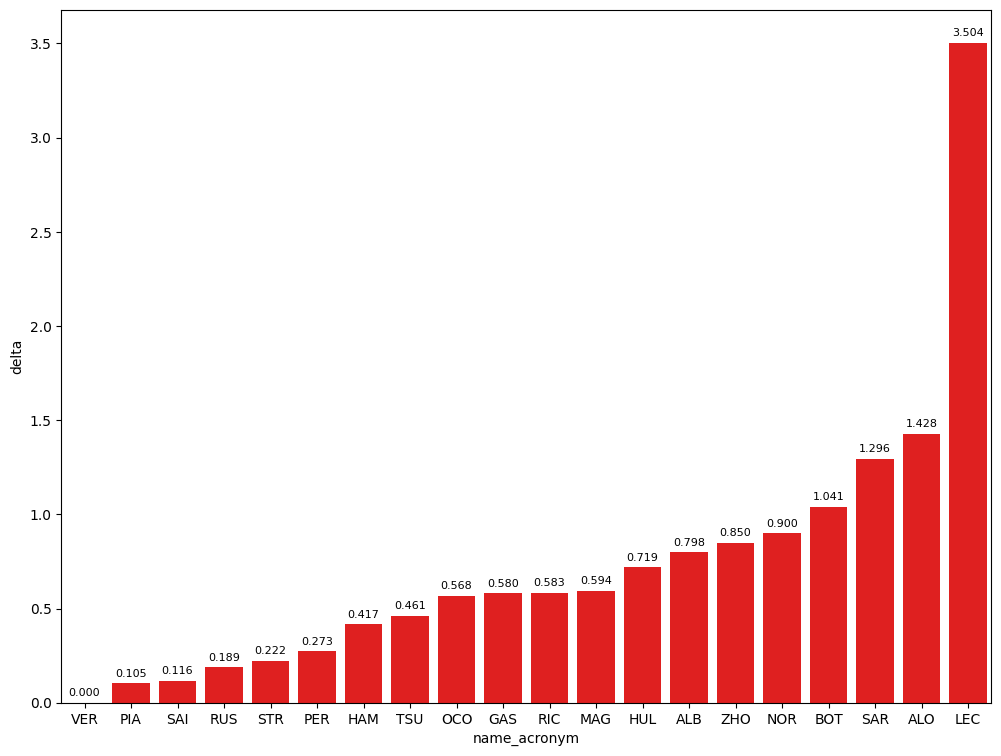

In [32]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [33]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
398,29.473,George RUSSELL,SOFT,88.784,23
352,29.575,Lewis HAMILTON,SOFT,89.012,20
395,29.606,Max VERSTAPPEN,SOFT,88.595,22
400,29.612,Carlos SAINZ,SOFT,88.711,21
404,29.729,Lando NORRIS,SOFT,96.398,18
401,29.746,Oscar PIASTRI,SOFT,88.700,21
327,29.748,Pierre GASLY,SOFT,89.175,20
411,29.791,Esteban OCON,SOFT,89.163,21
407,29.814,Lance STROLL,SOFT,88.817,22
349,29.861,Yuki TSUNODA,MEDIUM,89.172,19


In [34]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
395,33.604,Max VERSTAPPEN,SOFT,88.595,22
404,33.706,Lando NORRIS,SOFT,96.398,18
418,33.802,Nico HULKENBERG,SOFT,89.343,23
406,33.803,Yuki TSUNODA,MEDIUM,89.056,22
401,33.858,Oscar PIASTRI,SOFT,88.700,21
376,33.900,Sergio PEREZ,SOFT,88.868,19
400,33.904,Carlos SAINZ,SOFT,88.711,21
407,33.916,Lance STROLL,SOFT,88.817,22
345,33.965,George RUSSELL,SOFT,88.910,20
328,33.969,Alexander ALBON,SOFT,89.540,17


In [35]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
418,24.939,Nico HULKENBERG,SOFT,89.343,23
378,24.992,Alexander ALBON,SOFT,89.393,20
376,25.039,Sergio PEREZ,SOFT,88.868,19
407,25.087,Lance STROLL,SOFT,88.817,22
401,25.096,Oscar PIASTRI,SOFT,88.700,21
353,25.134,Kevin MAGNUSSEN,SOFT,89.243,21
369,25.145,Logan SARGEANT,MEDIUM,89.891,19
400,25.195,Carlos SAINZ,SOFT,88.711,21
402,25.219,ZHOU Guanyu,SOFT,89.445,21
359,25.222,Esteban OCON,SOFT,89.351,18


### Mean pace with the different compound used on the session

In [36]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
SOFT,89.267115
MEDIUM,91.750022
HARD,92.107432


### Long laps

In [37]:
MINIMUN_SECONDS = 90
MAXIMUM_SECONDS = 95

#### Red Bull Racing

In [38]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
5,1234,9497,1,1,1,5,MEDIUM,0
7,1234,9497,1,11,1,5,MEDIUM,0
26,1234,9497,2,11,6,8,MEDIUM,4
32,1234,9497,2,1,6,18,MEDIUM,4
44,1234,9497,3,11,9,18,MEDIUM,7
62,1234,9497,3,1,19,21,SOFT,0
63,1234,9497,4,11,19,21,SOFT,0
77,1234,9497,5,11,22,24,MEDIUM,17
78,1234,9497,4,1,22,26,SOFT,3


In [39]:
libraryDataF1.getinfolonglaps(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
32,Max VERSTAPPEN,MEDIUM,2024-05-03T16:33:32.677000+00:00,2,30.747,34.684,25.640,91.071
127,Max VERSTAPPEN,MEDIUM,2024-05-03T16:53:02.293000+00:00,7,31.654,35.126,26.145,92.925
143,Max VERSTAPPEN,MEDIUM,2024-05-03T16:54:35.355000+00:00,8,31.653,35.103,26.063,92.819
158,Max VERSTAPPEN,MEDIUM,2024-05-03T16:56:08.113000+00:00,9,31.672,35.319,26.059,93.050
171,Max VERSTAPPEN,MEDIUM,2024-05-03T16:57:42.711000+00:00,10,31.514,35.369,26.055,92.938
181,Max VERSTAPPEN,MEDIUM,2024-05-03T16:59:14.126000+00:00,11,31.529,35.102,25.890,92.521
205,Max VERSTAPPEN,MEDIUM,2024-05-03T17:02:21.908000+00:00,13,31.626,35.220,25.918,92.764
222,Max VERSTAPPEN,MEDIUM,2024-05-03T17:03:55.129000+00:00,14,31.503,35.184,25.802,92.489
239,Max VERSTAPPEN,MEDIUM,2024-05-03T17:05:27.160000+00:00,15,31.388,35.272,26.018,92.678
254,Max VERSTAPPEN,MEDIUM,2024-05-03T17:06:59.773000+00:00,16,31.257,35.295,25.956,92.508


In [40]:
libraryDataF1.getinfolonglaps(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
34,Sergio PEREZ,MEDIUM,2024-05-03T16:33:37.127000+00:00,2,31.073,34.698,25.590,91.361
177,Sergio PEREZ,MEDIUM,2024-05-03T16:58:56.401000+00:00,9,31.701,35.498,26.151,93.350
187,Sergio PEREZ,MEDIUM,2024-05-03T17:00:29.750000+00:00,10,31.461,35.638,26.028,93.127
202,Sergio PEREZ,MEDIUM,2024-05-03T17:02:02.889000+00:00,11,31.613,35.424,26.012,93.049
218,Sergio PEREZ,MEDIUM,2024-05-03T17:03:36.051000+00:00,12,31.578,35.091,26.071,92.740
234,Sergio PEREZ,MEDIUM,2024-05-03T17:05:08.678000+00:00,13,31.665,35.401,26.276,93.342
264,Sergio PEREZ,MEDIUM,2024-05-03T17:08:17.168000+00:00,15,31.508,35.157,25.851,92.516
279,Sergio PEREZ,MEDIUM,2024-05-03T17:09:49.699000+00:00,16,31.458,34.777,25.790,92.025


#### Ferrari

In [41]:
libraryDataF1.getinfolonglaps(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
29,Charles LECLERC,HARD,2024-05-03T16:33:25.277000+00:00,2,30.804,35.199,26.096,92.099


In [42]:
libraryDataF1.getinfolonglaps(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
25,Carlos SAINZ,HARD,2024-05-03T16:32:55.244000+00:00,2,31.148,35.477,26.128,92.753
43,Carlos SAINZ,HARD,2024-05-03T16:34:27.125000+00:00,3,30.964,35.151,25.879,91.994
248,Carlos SAINZ,HARD,2024-05-03T17:06:41.245000+00:00,13,30.613,34.954,25.949,91.516
263,Carlos SAINZ,HARD,2024-05-03T17:08:12.691000+00:00,14,30.629,35.249,25.988,91.866
278,Carlos SAINZ,HARD,2024-05-03T17:09:44.617000+00:00,15,30.695,35.060,26.070,91.825


#### Mercedes

In [43]:
libraryDataF1.getinfolonglaps(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
24,Lewis HAMILTON,MEDIUM,2024-05-03T16:32:46.629000+00:00,2,30.205,35.255,25.667,91.127
89,Lewis HAMILTON,MEDIUM,2024-05-03T16:48:40.981000+00:00,6,29.935,34.714,25.484,90.133
227,Lewis HAMILTON,MEDIUM,2024-05-03T17:04:28.013000+00:00,12,31.485,35.689,26.272,93.446
243,Lewis HAMILTON,MEDIUM,2024-05-03T17:06:01.455000+00:00,13,31.233,35.496,26.126,92.855
259,Lewis HAMILTON,MEDIUM,2024-05-03T17:07:34.285000+00:00,14,31.163,35.387,25.918,92.468
273,Lewis HAMILTON,MEDIUM,2024-05-03T17:09:06.732000+00:00,15,30.760,35.260,26.060,92.080
284,Lewis HAMILTON,MEDIUM,2024-05-03T17:10:38.817000+00:00,16,30.949,35.379,25.943,92.271


In [44]:
libraryDataF1.getinfolonglaps(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
37,George RUSSELL,MEDIUM,2024-05-03T16:33:44.497000+00:00,2,31.644,35.102,25.875,92.621
219,George RUSSELL,MEDIUM,2024-05-03T17:03:40.582000+00:00,12,30.858,35.695,26.217,92.770
235,George RUSSELL,MEDIUM,2024-05-03T17:05:13.378000+00:00,13,30.940,35.618,26.140,92.698
250,George RUSSELL,MEDIUM,2024-05-03T17:06:46.074000+00:00,14,30.958,35.585,25.770,92.313
265,George RUSSELL,MEDIUM,2024-05-03T17:08:18.350000+00:00,15,31.136,35.302,25.715,92.153
291,George RUSSELL,MEDIUM,2024-05-03T17:11:30.393000+00:00,17,30.778,35.266,26.052,92.096


#### McLaren

In [45]:
libraryDataF1.getinfolonglaps(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
93,Lando NORRIS,HARD,2024-05-03T16:49:09.790000+00:00,3,31.385,35.093,26.077,92.555
125,Lando NORRIS,HARD,2024-05-03T16:52:50.600000+00:00,5,30.366,34.618,25.804,90.788
294,Lando NORRIS,HARD,2024-05-03T17:12:09.131000+00:00,12,30.549,34.796,25.656,91.001
302,Lando NORRIS,HARD,2024-05-03T17:13:40.162000+00:00,13,30.779,34.907,25.800,91.486
310,Lando NORRIS,HARD,2024-05-03T17:15:11.897000+00:00,14,30.891,34.977,25.755,91.623
315,Lando NORRIS,HARD,2024-05-03T17:16:43.266000+00:00,15,30.920,35.082,25.972,91.974


In [46]:
libraryDataF1.getinfolonglaps(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
20,Oscar PIASTRI,HARD,2024-05-03T16:32:03.324000+00:00,2,30.837,34.915,25.739,91.491
92,Oscar PIASTRI,HARD,2024-05-03T16:49:01.946000+00:00,7,30.422,34.389,25.620,90.431
214,Oscar PIASTRI,HARD,2024-05-03T17:03:20.897000+00:00,10,30.182,34.407,25.433,90.022
293,Oscar PIASTRI,HARD,2024-05-03T17:12:05.728000+00:00,15,30.968,34.937,25.847,91.752
301,Oscar PIASTRI,HARD,2024-05-03T17:13:37.382000+00:00,16,31.331,35.081,26.007,92.419
309,Oscar PIASTRI,HARD,2024-05-03T17:15:09.739000+00:00,17,31.231,34.787,26.052,92.070
314,Oscar PIASTRI,HARD,2024-05-03T17:16:41.801000+00:00,18,31.093,35.194,26.028,92.315


#### Aston Martin

In [47]:
libraryDataF1.getinfolonglaps(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
88,Fernando ALONSO,HARD,2024-05-03T16:48:19.719000+00:00,4,30.924,34.544,25.680,91.148
121,Fernando ALONSO,HARD,2024-05-03T16:52:04.735000+00:00,6,30.578,34.631,25.570,90.779
154,Fernando ALONSO,HARD,2024-05-03T16:55:47.668000+00:00,8,30.394,34.476,25.621,90.491
299,Fernando ALONSO,HARD,2024-05-03T17:13:12.570000+00:00,11,30.770,34.906,25.746,91.422
326,Fernando ALONSO,HARD,2024-05-03T17:18:52.307000+00:00,14,30.301,34.369,25.353,90.023
357,Fernando ALONSO,HARD,2024-05-03T17:22:40.164000+00:00,16,31.546,35.806,26.035,93.387
371,Fernando ALONSO,HARD,2024-05-03T17:24:13.476000+00:00,17,31.099,35.475,25.995,92.569
383,Fernando ALONSO,HARD,2024-05-03T17:25:46.061000+00:00,18,30.945,35.365,26.276,92.586
397,Fernando ALONSO,HARD,2024-05-03T17:27:18.707000+00:00,19,30.929,35.381,25.968,92.278
412,Fernando ALONSO,HARD,2024-05-03T17:28:51.033000+00:00,20,31.582,35.680,26.078,93.340


In [48]:
libraryDataF1.getinfolonglaps(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
91,Lance STROLL,HARD,2024-05-03T16:48:54.743000+00:00,4,31.183,35.059,26.019,92.261
122,Lance STROLL,HARD,2024-05-03T16:52:12.563000+00:00,6,30.764,34.710,25.402,90.876
156,Lance STROLL,HARD,2024-05-03T16:56:02.091000+00:00,8,30.955,34.507,25.550,91.012
184,Lance STROLL,HARD,2024-05-03T16:59:51.560000+00:00,10,30.467,34.794,25.421,90.682
213,Lance STROLL,HARD,2024-05-03T17:03:14.516000+00:00,12,31.079,35.188,25.880,92.147
230,Lance STROLL,HARD,2024-05-03T17:04:46.663000+00:00,13,30.998,35.055,25.755,91.808
245,Lance STROLL,HARD,2024-05-03T17:06:18.592000+00:00,14,30.974,35.068,25.647,91.689
261,Lance STROLL,HARD,2024-05-03T17:07:50.099000+00:00,15,30.866,35.115,25.594,91.575
275,Lance STROLL,HARD,2024-05-03T17:09:21.742000+00:00,16,30.817,35.132,25.696,91.645


#### RB

In [49]:
libraryDataF1.getinfolonglaps(jointables2,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
26,Daniel RICCIARDO,HARD,2024-05-03T16:32:57.799000+00:00,2,32.209,35.758,26.200,94.167
44,Daniel RICCIARDO,HARD,2024-05-03T16:34:31.830000+00:00,3,31.504,35.352,25.893,92.749
94,Daniel RICCIARDO,HARD,2024-05-03T16:49:13.901000+00:00,6,31.062,34.801,25.741,91.604
129,Daniel RICCIARDO,HARD,2024-05-03T16:53:10.030000+00:00,8,30.790,34.554,25.771,91.115
164,Daniel RICCIARDO,HARD,2024-05-03T16:57:04.680000+00:00,10,30.554,34.495,25.687,90.736
228,Daniel RICCIARDO,HARD,2024-05-03T17:04:30.669000+00:00,14,31.286,35.439,25.909,92.634
244,Daniel RICCIARDO,HARD,2024-05-03T17:06:03.143000+00:00,15,31.426,35.051,25.724,92.201
260,Daniel RICCIARDO,HARD,2024-05-03T17:07:35.336000+00:00,16,31.353,35.215,25.755,92.323
274,Daniel RICCIARDO,HARD,2024-05-03T17:09:07.725000+00:00,17,31.293,35.226,25.846,92.365


In [50]:
libraryDataF1.getinfolonglaps(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
27,Yuki TSUNODA,HARD,2024-05-03T16:33:11.991000+00:00,2,31.170,35.656,25.788,92.614
85,Yuki TSUNODA,HARD,2024-05-03T16:47:57.572000+00:00,6,32.202,34.644,25.580,92.426
119,Yuki TSUNODA,HARD,2024-05-03T16:51:46.082000+00:00,8,30.482,34.378,25.632,90.492
211,Yuki TSUNODA,HARD,2024-05-03T17:02:49.852000+00:00,12,32.215,35.161,26.155,93.531
226,Yuki TSUNODA,HARD,2024-05-03T17:04:23.381000+00:00,13,31.106,35.233,26.143,92.482
242,Yuki TSUNODA,HARD,2024-05-03T17:05:55.792000+00:00,14,31.444,35.237,26.057,92.738


#### Haas

In [51]:
libraryDataF1.getinfolonglaps(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
16,Kevin MAGNUSSEN,HARD,2024-05-03T16:31:43.853000+00:00,2,31.631,35.176,25.684,92.491
28,Kevin MAGNUSSEN,HARD,2024-05-03T16:33:16.315000+00:00,3,30.766,35.004,25.609,91.379
116,Kevin MAGNUSSEN,HARD,2024-05-03T16:51:37.552000+00:00,7,32.210,35.583,26.395,94.188
130,Kevin MAGNUSSEN,HARD,2024-05-03T16:53:11.658000+00:00,8,31.924,35.438,26.245,93.607
146,Kevin MAGNUSSEN,HARD,2024-05-03T16:54:45.283000+00:00,9,32.113,35.759,26.219,94.091
159,Kevin MAGNUSSEN,HARD,2024-05-03T16:56:19.334000+00:00,10,31.816,35.468,26.299,93.583
172,Kevin MAGNUSSEN,HARD,2024-05-03T16:57:52.889000+00:00,11,31.706,35.663,26.348,93.717
182,Kevin MAGNUSSEN,HARD,2024-05-03T16:59:26.605000+00:00,12,31.526,35.655,26.137,93.318
193,Kevin MAGNUSSEN,HARD,2024-05-03T17:00:59.921000+00:00,13,31.840,35.673,26.491,94.004
206,Kevin MAGNUSSEN,HARD,2024-05-03T17:02:34.003000+00:00,14,31.833,35.544,26.241,93.618


In [52]:
libraryDataF1.getinfolonglaps(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
38,Nico HULKENBERG,HARD,2024-05-03T16:33:46.118000+00:00,2,32.403,36.371,25.728,94.502
123,Nico HULKENBERG,HARD,2024-05-03T16:52:28.777000+00:00,6,30.700,34.710,25.572,90.982
215,Nico HULKENBERG,HARD,2024-05-03T17:03:21.692000+00:00,10,31.884,35.464,26.081,93.429
232,Nico HULKENBERG,HARD,2024-05-03T17:04:56.162000+00:00,11,31.690,35.709,26.351,93.750
262,Nico HULKENBERG,HARD,2024-05-03T17:08:04.974000+00:00,13,31.679,35.653,26.145,93.477
277,Nico HULKENBERG,HARD,2024-05-03T17:09:38.427000+00:00,14,31.795,35.359,25.952,93.106
287,Nico HULKENBERG,HARD,2024-05-03T17:11:11.448000+00:00,15,32.147,35.812,26.107,94.066
296,Nico HULKENBERG,HARD,2024-05-03T17:12:45.552000+00:00,16,31.938,35.594,26.221,93.753
305,Nico HULKENBERG,HARD,2024-05-03T17:14:19.227000+00:00,17,31.814,35.650,26.115,93.579


#### Alpine

In [53]:
libraryDataF1.getinfolonglaps(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
19,Esteban OCON,HARD,2024-05-03T16:31:54.601000+00:00,2,31.235,35.406,25.746,92.387
138,Esteban OCON,HARD,2024-05-03T16:53:41.306000+00:00,7,30.246,34.594,25.539,90.379
169,Esteban OCON,HARD,2024-05-03T16:57:28.283000+00:00,9,30.491,34.739,25.589,90.819
194,Esteban OCON,HARD,2024-05-03T17:01:10.915000+00:00,11,30.280,34.660,25.582,90.522
207,Esteban OCON,HARD,2024-05-03T17:02:41.375000+00:00,12,31.016,35.437,25.981,92.434
224,Esteban OCON,HARD,2024-05-03T17:04:13.833000+00:00,13,30.845,35.275,25.880,92.000
241,Esteban OCON,HARD,2024-05-03T17:05:45.872000+00:00,14,30.968,35.380,25.955,92.303
257,Esteban OCON,HARD,2024-05-03T17:07:18.158000+00:00,15,31.051,35.260,25.983,92.294


In [54]:
libraryDataF1.getinfolonglaps(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
21,Pierre GASLY,HARD,2024-05-03T16:32:08.594000+00:00,2,30.885,35.517,25.818,92.220
97,Pierre GASLY,HARD,2024-05-03T16:49:25.904000+00:00,7,30.632,34.906,25.822,91.360
128,Pierre GASLY,HARD,2024-05-03T16:53:05.839000+00:00,9,30.401,34.893,25.823,91.117
161,Pierre GASLY,HARD,2024-05-03T16:56:45.655000+00:00,11,30.049,34.552,26.003,90.604
189,Pierre GASLY,HARD,2024-05-03T17:00:39.131000+00:00,13,30.173,34.902,25.668,90.743
204,Pierre GASLY,HARD,2024-05-03T17:02:09.922000+00:00,14,30.878,35.407,26.110,92.395
220,Pierre GASLY,HARD,2024-05-03T17:03:42.326000+00:00,15,30.911,35.396,25.946,92.253
236,Pierre GASLY,HARD,2024-05-03T17:05:14.553000+00:00,16,31.020,35.290,25.776,92.086
251,Pierre GASLY,HARD,2024-05-03T17:06:46.663000+00:00,17,31.093,35.442,25.562,92.097


#### Williams

In [55]:
libraryDataF1.getinfolonglaps(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
86,Alexander ALBON,HARD,2024-05-03T16:48:03.488000+00:00,2,31.500,34.948,25.489,91.937
115,Alexander ALBON,HARD,2024-05-03T16:51:30.611000+00:00,4,31.237,34.531,25.356,91.124
165,Alexander ALBON,HARD,2024-05-03T16:57:12.709000+00:00,7,31.513,35.089,25.588,92.190
176,Alexander ALBON,HARD,2024-05-03T16:58:44.889000+00:00,8,31.446,34.987,25.780,92.213
185,Alexander ALBON,HARD,2024-05-03T17:00:17.085000+00:00,9,31.526,35.033,25.770,92.329
217,Alexander ALBON,HARD,2024-05-03T17:03:25.089000+00:00,11,31.315,34.816,25.837,91.968
233,Alexander ALBON,HARD,2024-05-03T17:04:57.066000+00:00,12,31.305,35.188,25.664,92.157


In [56]:
libraryDataF1.getinfolonglaps(jointables2,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
84,Logan SARGEANT,HARD,2024-05-03T16:47:48.857000+00:00,4,31.477,35.512,25.747,92.736
96,Logan SARGEANT,HARD,2024-05-03T16:49:21.612000+00:00,5,31.313,34.647,25.542,91.502
149,Logan SARGEANT,HARD,2024-05-03T16:55:02.245000+00:00,8,31.747,34.967,25.966,92.680
160,Logan SARGEANT,HARD,2024-05-03T16:56:34.834000+00:00,9,31.790,35.018,25.872,92.680
173,Logan SARGEANT,HARD,2024-05-03T16:58:07.597000+00:00,10,31.672,35.141,25.797,92.610
183,Logan SARGEANT,HARD,2024-05-03T16:59:40.154000+00:00,11,31.568,35.240,25.779,92.587
210,Logan SARGEANT,HARD,2024-05-03T17:02:47.896000+00:00,13,32.678,34.983,25.831,93.492
322,Logan SARGEANT,MEDIUM,2024-05-03T17:18:10.359000+00:00,16,30.525,34.425,25.201,90.151


#### Kick Sauber

In [57]:
libraryDataF1.getinfolonglaps(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
22,ZHOU Guanyu,MEDIUM,2024-05-03T16:32:18.563000+00:00,2,32.070,35.519,25.949,93.538
95,ZHOU Guanyu,MEDIUM,2024-05-03T16:49:17.744000+00:00,7,30.851,34.781,25.735,91.367
131,ZHOU Guanyu,MEDIUM,2024-05-03T16:53:14.549000+00:00,9,30.852,34.605,25.692,91.149
179,ZHOU Guanyu,MEDIUM,2024-05-03T16:59:03.346000+00:00,12,30.329,34.500,25.438,90.267
311,ZHOU Guanyu,SOFT,2024-05-03T17:15:43.512000+00:00,15,30.485,34.465,25.323,90.273


In [58]:
libraryDataF1.getinfolonglaps(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
23,Valtteri BOTTAS,HARD,2024-05-03T16:32:24.441000+00:00,2,31.411,35.484,25.985,92.880
133,Valtteri BOTTAS,HARD,2024-05-03T16:53:23.825000+00:00,7,30.654,34.517,25.716,90.887
221,Valtteri BOTTAS,HARD,2024-05-03T17:03:49.160000+00:00,10,31.338,35.425,26.311,93.074
238,Valtteri BOTTAS,HARD,2024-05-03T17:05:22.188000+00:00,11,31.646,35.444,26.149,93.239
253,Valtteri BOTTAS,HARD,2024-05-03T17:06:55.502000+00:00,12,31.553,35.445,26.056,93.054


## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [ ]:
libraryDataF1.obtain_information('race_control',year=2024,country_acronym='USA')

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9497)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9497)
drivers = libraryDataF1.obtain_information('drivers',session_key=9497)

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 87.241 seconds (1.27.241= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (93.347 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 93.347")
competitiveLaps

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

#### Best lap per driver compared with the best lap of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-05-04T20:25:01+00:00'"
maximumDateQ2 = "date_start <'2024-05-04T20:48:00+00:00' and date_start >'2024-05-04T20:25:01+00:00'"
maximumDateQ3 = "date_start >'2024-05-04T20:48:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]
P15

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

#### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9497)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9497)
drivers = libraryDataF1.obtain_information('drivers',session_key=9497)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False").dropna()
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

#### Obtain data tyres
General case

HARD

MEDIUM

SOFT

### Hard tyres
General explanation

In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'HARD',98)

### Medium tyres
General explanation 

In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'MEDIUM',98)

### Soft tyres
General explanation

In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'SOFT',98)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 98").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Comparaison beetween drivers
General explanation

#### Red Bull Racing

In [ ]:
race.query("driver_number== 1 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 11 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### Ferrari

In [ ]:
race.query("driver_number== 16 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 55 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### McLaren

In [ ]:
race.query("driver_number== 4 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 81 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### Mercedes

In [ ]:
race.query("driver_number== 44 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 63 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### Aston Martin

In [ ]:
race.query("driver_number== 14 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 18 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### Haas F1 Team

In [ ]:
race.query("driver_number== 20 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 27 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### RB

In [ ]:
race.query("driver_number== 3 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 22 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### Williams

In [ ]:
race.query("driver_number== 2 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 23 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### Alpine

In [ ]:
race.query("driver_number== 10 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 31 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

#### Kick Sauber

In [ ]:
race.query("driver_number== 24 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

In [ ]:
race.query("driver_number== 77 and lap_duration <=110 and lap_duration > 94").lap_duration.mean()

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9497)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration

### Race pace

In [ ]:
MINIMUN_SECONDS = 90
MAXIMUM_SECONDS = 95

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 16 or driver_number == 55')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 44 or driver_number == 63')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 14 or driver_number == 18')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 4 or driver_number == 81')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Haas F1 Team

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
libraryDataF1.getinfolonglaps(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Williams

In [ ]:
stintInformation.query('driver_number == 23 or driver_number == 2')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
libraryDataF1.getinfolonglaps(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolonglaps(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)